# Group Good Morning

## Team Members

*   Neo Zheng Weng A22EC0093
*   Wong Khai Shian Nicholas A22EC0292

# Task 1: Dataset Selection

*   **Dataset Source:** [2019 Airline Delays and Cancellations on Kaggle](https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations?resource=download)
*   Download dataset via KaggleHub



In [ ]:
!pip install -q kaggle

In [ ]:
import os
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("threnjen/2019-airline-delays-and-cancellations")

print("Path to dataset files:", path)

# Load data
csv_path = os.path.join(path, "full_data_flightdelay.csv")
df = pd.read_csv(csv_path)

# Basic info
print("Dataset Size in Memory (MB):", round(df.memory_usage(deep=True).sum() / (1024**2), 2))
print("Number of Records (rows):", df.shape[0])
print("Number of Features (columns):", df.shape[1])

Path to dataset files: /kaggle/input/2019-airline-delays-and-cancellations
Dataset Size in Memory (MB): 2955.72
Number of Records (rows): 6489062
Number of Features (columns): 26


# Task 2: Load and Inspect Data

*   Pandas full loading without optimization
*   Traditional data handling

In [ ]:
import time
import psutil
import pandas as pd

# Measure time before loading
start_time = time.time()

# Load the full dataset (no optimization)
df_pd = pd.read_csv(csv_path)

# Simple data cleaning
df_pd = df_pd.dropna().drop_duplicates()

end_time = time.time()

# Calculate time taken and memory used by pandas
pandas_without_opt_memory_used = df_pd.memory_usage(deep=True).sum() / 1024**2
pandas_without_opt_execution_time = end_time - start_time

# Performance results
print("✅ Pandas Full Loading (No Optimization) Performance")
print(f"Memory Usage: {pandas_without_opt_memory_used:.2f} MB")
print(f"Execution Time: {pandas_without_opt_execution_time:.2f} seconds")

# Data inspection
print("\n✅ Data Inspection")
print(f"Data Shape: {df_pd.shape}")
print("Column Names:", df_pd.columns.tolist())
print("\nData Types:")
print(df_pd.dtypes)

# Show first 5 rows
print("\n✅ Preview Data:")
print(df_pd.head())

✅ Pandas Full Loading (No Optimization) Performance
Memory Usage: 2992.44 MB
Execution Time: 57.97 seconds

✅ Data Inspection
Data Shape: (6460589, 26)
Column Names: ['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']

Data Types:
MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      obj

# Task 3 : Apply Big Data Handling Strategies

1. Load Less Data

2. Use Chunking

3. Optimize Data Types

4. Sampling

5. Parallel Processing with Dask

## Pandas

In [9]:
import time
import psutil
import pandas as pd
import os

# Step 1: Load Less Data - only select meaningful columns
usecols = [
    'MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
    'CARRIER_NAME', 'NUMBER_OF_SEATS', 'PLANE_AGE',
    'DEPARTING_AIRPORT'
]

# Step 3: Optimize Data Types
dtype_map = {
    'MONTH': 'int8',
    'DAY_OF_WEEK': 'int8',
    'DEP_DEL15': 'int8',
    'DEP_TIME_BLK': 'category',
    'DISTANCE_GROUP': 'int8',
    'CARRIER_NAME': 'category',
    'NUMBER_OF_SEATS': 'int16',
    'PLANE_AGE': 'int16',
    'DEPARTING_AIRPORT': 'category',
}

# Step 2: Use Chunking (read small batches)
chunk_size = 100_000
cleaned_chunks = []

start_time = time.time()

# 1) Read each chunk, drop nulls (but do NOT drop duplicates yet)
for chunk in pd.read_csv(csv_path, usecols=usecols, dtype=dtype_map, chunksize=chunk_size):
    cleaned = chunk.dropna()
    cleaned_chunks.append(cleaned)

# 2) Concatenate all cleaned chunks into a single DataFrame
df_all_clean = pd.concat(cleaned_chunks, ignore_index=True)

# 3) Drop duplicates globally (across the entire DataFrame)
df_all_clean = df_all_clean.drop_duplicates()

# 4) Sampling - randomly take 10% of the fully cleaned+deduplicated DataFrame
df_pd_opt = df_all_clean.sample(frac=0.1, random_state=42)

end_time = time.time()

# Memory usage and execution time
pandas_opt_memory_usage = df_pd_opt.memory_usage(deep=True).sum() / 1024**2
pandas_opt_execution_time = end_time - start_time

# Performance results
print("✅ Pandas Optimization Performance")
print(f"Memory Usage: {pandas_opt_memory_usage:.2f} MB")
print(f"Execution Time: {pandas_opt_execution_time:.2f} seconds")

# Data inspection
print("\n✅ Data Inspection")
print(f"Data Shape: {df_pd_opt.shape}")
print("Column Names:", df_pd_opt.columns.tolist())
print("\nData Types:")
print(df_pd_opt.dtypes)

# Show first 5 rows
print("\n✅ Preview Data:")
print(df_pd_opt.head())

✅ Pandas Optimization Performance
Memory Usage: 44.86 MB
Execution Time: 27.72 seconds

✅ Data Inspection
Data Shape: (472193, 9)
Column Names: ['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP', 'NUMBER_OF_SEATS', 'CARRIER_NAME', 'PLANE_AGE', 'DEPARTING_AIRPORT']

Data Types:
MONTH                    int8
DAY_OF_WEEK              int8
DEP_DEL15                int8
DEP_TIME_BLK         category
DISTANCE_GROUP           int8
NUMBER_OF_SEATS         int16
CARRIER_NAME         category
PLANE_AGE               int16
DEPARTING_AIRPORT      object
dtype: object

✅ Preview Data:
         MONTH  DAY_OF_WEEK  DEP_DEL15 DEP_TIME_BLK  DISTANCE_GROUP  \
1356142      3            5          1    1000-1059               2   
3035097      6            7          1    0600-0659               4   
2024640      4            1          0    0001-0559               6   
6325782     12            7          1    0700-0759               4   
5366877     10            1          1    1300

## Dask

In [ ]:
!pip install dask --quiet

In [10]:
import time
import psutil
import dask.dataframe as dd

# Step 1: Load Less Data - only select meaningful columns
usecols = [
    'MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
    'CARRIER_NAME', 'NUMBER_OF_SEATS', 'PLANE_AGE',
    'DEPARTING_AIRPORT'
]

# Step 3: Optimize Data Types
dtype_map = {
    'MONTH': 'int8',
    'DAY_OF_WEEK': 'int8',
    'DEP_DEL15': 'int8',
    'DEP_TIME_BLK': 'category',
    'DISTANCE_GROUP': 'int8',
    'CARRIER_NAME': 'category',
    'NUMBER_OF_SEATS': 'int16',
    'PLANE_AGE': 'int16',
    'DEPARTING_AIRPORT': 'category',
}

start_time = time.time()

# Step 2 & 5: Load CSV using Dask DataFrame (chunking + parallel processing)
dask_df = dd.read_csv(
    csv_path,
    blocksize="100MB",
    usecols=usecols,
    dtype=dtype_map,
    assume_missing=True  # safer when ints can have missing values
)

# Basic data cleaning
dask_df = dask_df.dropna().drop_duplicates()

# Step 4: Sample 10% of the data for faster prototyping
dask_sampled = dask_df.sample(frac=0.1, random_state=42)

# Trigger actual computation (Dask is lazy by default)
sampled_df_dask = dask_sampled.compute()

end_time = time.time()

# Memory usage and execution time
dask_memory_usage = sampled_df_dask.memory_usage(deep=True).sum() / 1024**2
dask_execution_time = end_time - start_time

# Performance results
print("✅ Dask Optimization Performance")
print(f"Memory Usage: {dask_memory_usage:.2f} MB")
print(f"Execution Time: {dask_execution_time:.2f} seconds")

# Data Inspection
print("\n✅ Data Inspection")
print(f"Data Shape: {sampled_df_dask.shape}")
print("Column Names:", sampled_df_dask.columns.tolist())
print("\nData Types:")
print(sampled_df_dask.dtypes)

# Show first 5 rows
print("\n✅ Preview Data:")
print(sampled_df_dask.head())

✅ Dask Optimization Performance
Memory Usage: 8.57 MB
Execution Time: 23.85 seconds

✅ Data Inspection
Data Shape: (472194, 9)
Column Names: ['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP', 'NUMBER_OF_SEATS', 'CARRIER_NAME', 'PLANE_AGE', 'DEPARTING_AIRPORT']

Data Types:
MONTH                    int8
DAY_OF_WEEK              int8
DEP_DEL15                int8
DEP_TIME_BLK         category
DISTANCE_GROUP           int8
NUMBER_OF_SEATS         int16
CARRIER_NAME         category
PLANE_AGE               int16
DEPARTING_AIRPORT    category
dtype: object

✅ Preview Data:
        MONTH  DAY_OF_WEEK  DEP_DEL15 DEP_TIME_BLK  DISTANCE_GROUP  \
319298      9            7          0    1600-1659               1   
74403      11            4          0    1100-1159               5   
168807      1            7          0    1500-1559               3   
307291      4            2          0    0600-0659               5   
252640      8            4          0    0800-0859    

## Polars

In [ ]:
!pip install polars --quiet

In [12]:
import time
import psutil
import polars as pl

# Step 1: Define columns to load (Load Less Data)
usecols = [
    'MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
    'CARRIER_NAME', 'NUMBER_OF_SEATS', 'PLANE_AGE', 'DEPARTING_AIRPORT'
]

# Step 2 & 3: Load CSV with Polars, specify dtypes for memory optimization
dtype_map = {
    'MONTH': pl.Int8,
    'DAY_OF_WEEK': pl.Int8,
    'DEP_DEL15': pl.Int8,
    'DEP_TIME_BLK': pl.Categorical,
    'DISTANCE_GROUP': pl.Int8,
    'CARRIER_NAME': pl.Categorical,
    'NUMBER_OF_SEATS': pl.Int16,
    'PLANE_AGE': pl.Int16,
    'DEPARTING_AIRPORT': pl.Categorical,
}

start_time = time.time()

# Polars read_csv supports columns and dtypes specification
polars_df = pl.read_csv(
    csv_path,
    columns=usecols,
    schema_overrides=dtype_map,
    null_values=["", "NA", "NaN"]  # handle common null values
)

# Basic Data Cleaning
polars_df = polars_df.drop_nulls().unique()

# Step 4: Sample 10% of data for prototyping
sampled_df_polars = polars_df.sample(fraction=0.1, seed=42)

end_time = time.time()

# Memory usage and execution time
polars_memory_usage = sampled_df_polars.estimated_size() / 1024**2
polars_execution_time = end_time - start_time

# Performance results
print("✅ Polars Optimization Performance")
print(f"Memory Usage: {polars_memory_usage:.2f} MB")
print(f"Execution Time: {polars_execution_time:.2f} seconds")

# Data Inspection
print("\n✅ Data Inspection")
print(f"Data Shape: {sampled_df_polars.shape}")
print("Column Names:", sampled_df_polars.columns)
print("\nData Types:")
print(sampled_df_polars.dtypes)

# Show first 5 rows
print("\n✅ Preview Data:")
print(sampled_df_polars.head())

✅ Polars Optimization Performance
Memory Usage: 9.01 MB
Execution Time: 8.93 seconds

✅ Data Inspection
Data Shape: (472193, 9)
Column Names: ['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP', 'NUMBER_OF_SEATS', 'CARRIER_NAME', 'PLANE_AGE', 'DEPARTING_AIRPORT']

Data Types:
[Int8, Int8, Int8, Categorical(ordering='physical'), Int8, Int16, Categorical(ordering='physical'), Int16, Categorical(ordering='physical')]

✅ Preview Data:
shape: (5, 9)
┌───────┬────────────┬───────────┬────────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ MONTH ┆ DAY_OF_WEE ┆ DEP_DEL15 ┆ DEP_TIME_B ┆ … ┆ NUMBER_OF_ ┆ CARRIER_N ┆ PLANE_AGE ┆ DEPARTING │
│ ---   ┆ K          ┆ ---       ┆ LK         ┆   ┆ SEATS      ┆ AME       ┆ ---       ┆ _AIRPORT  │
│ i8    ┆ ---        ┆ i8        ┆ ---        ┆   ┆ ---        ┆ ---       ┆ i16       ┆ ---       │
│       ┆ i8         ┆           ┆ cat        ┆   ┆ i16        ┆ cat       ┆           ┆ cat       │
╞═══════╪════════════╪═════

# Task 4: Comparative Analysis

*   Memory Usage (MB)
*   Execution Time (seconds)



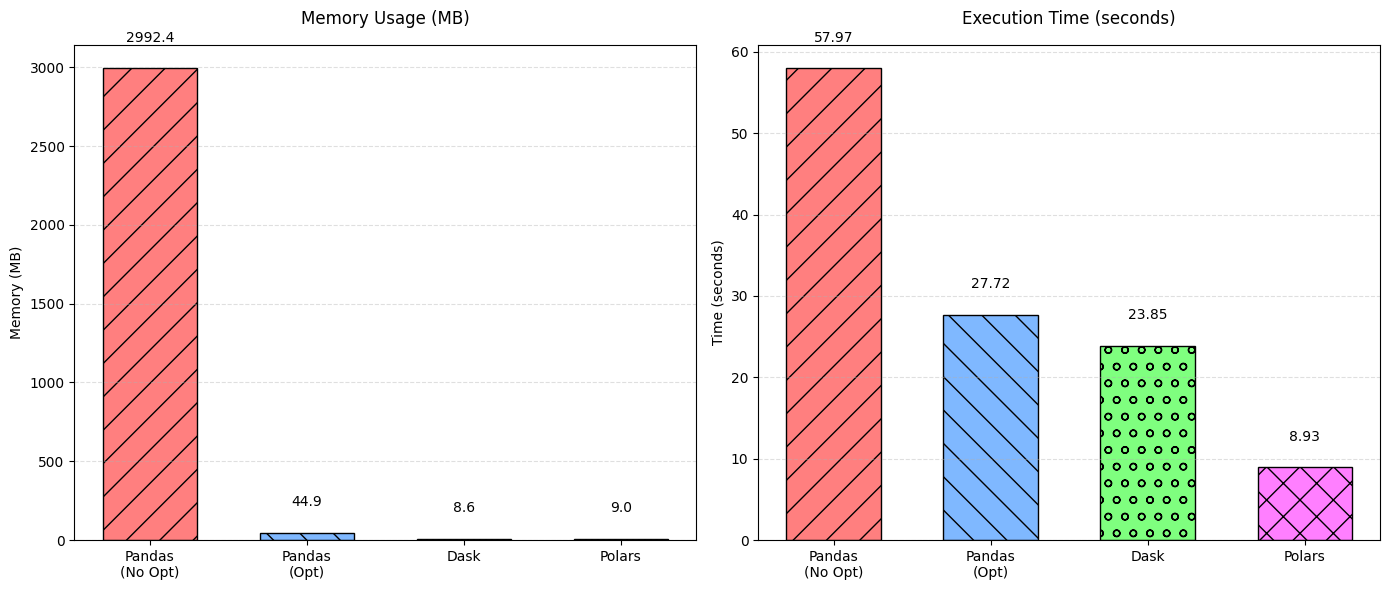

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define labels and values
methods = ['Pandas\n(No Opt)', 'Pandas\n(Opt)', 'Dask', 'Polars']
mem_values = [
    pandas_without_opt_memory_used,
    pandas_opt_memory_usage,
    dask_memory_usage,
    polars_memory_usage
]
time_values = [
    pandas_without_opt_execution_time,
    pandas_opt_execution_time,
    dask_execution_time,
    polars_execution_time
]

# Calculate max values for positioning labels
max_mem = max(mem_values)
max_time = max(time_values)

# Hatch patterns for the bars
hatches = ['/', '\\', 'o', 'x']

plt.figure(figsize=(14, 6), facecolor='white')

# Remove any predefined style
plt.style.use('default')

# Memory Usage Bar Chart
plt.subplot(1, 2, 1)
mem_bars = plt.bar(
    methods,
    mem_values,
    color=['#ff7f7f', '#7fb8ff', '#7fff7f', '#ff7fff'],
    width=0.6,
    edgecolor='black',
    linewidth=1
)
# Apply hatch patterns
for bar, hatch in zip(mem_bars, hatches):
    bar.set_hatch(hatch)

plt.title('Memory Usage (MB)', fontsize=12, pad=15)
plt.ylabel('Memory (MB)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels above memory bars
for bar in mem_bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + max_mem * 0.05,
        f'{height:.1f}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10
    )

# Execution Time Bar Chart
plt.subplot(1, 2, 2)
time_bars = plt.bar(
    methods,
    time_values,
    color=['#ff7f7f', '#7fb8ff', '#7fff7f', '#ff7fff'],
    width=0.6,
    edgecolor='black',
    linewidth=1
)
# Apply hatch patterns to time bars
for bar, hatch in zip(time_bars, hatches):
    bar.set_hatch(hatch)

plt.title('Execution Time (seconds)', fontsize=12, pad=15)
plt.ylabel('Time (seconds)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels above time bars
for bar in time_bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + max_time * 0.05,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10
    )

plt.tight_layout()
plt.show()